In [455]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline

In [456]:
training = pd.read_csv('cloudTrain.csv')
#training = pd.read_csv('cloudTest.csv')

In [457]:
training['AVERAGE_RAIN'].value_counts()

NOTHING                        6249
chuva fraca                     261
chuva moderada                  153
chuva leve                       45
aguaceiros fracos                38
chuva                            30
aguaceiros                       11
chuva forte                       8
trovoada com chuva leve           7
chuvisco fraco                    5
chuva de intensidade pesado       2
chuva de intensidade pesada       1
trovoada com chuva                1
chuvisco e chuva fraca            1
Name: AVERAGE_RAIN, dtype: int64

In [458]:
training.loc[training.AVERAGE_RAIN == 'trovoada com chuva leve', 'AVERAGE_RAIN'] = 'chuva leve'
training.loc[training.AVERAGE_RAIN == 'chuva de intensidade pesado', 'AVERAGE_RAIN'] = 'chuva forte'
training.loc[training.AVERAGE_RAIN == 'chuva de intensidade pesada', 'AVERAGE_RAIN'] = 'chuva forte'
training.loc[training.AVERAGE_RAIN == 'trovoada com chuva', 'AVERAGE_RAIN'] = 'chuva'
training.loc[training.AVERAGE_RAIN == 'chuvisco e chuva fraca', 'AVERAGE_RAIN'] = 'chuva fraca'
training.loc[training.AVERAGE_RAIN == 'chuvisco fraco', 'AVERAGE_RAIN'] = 'aguaceiros'

In [459]:
training['AVERAGE_RAIN'].value_counts()

NOTHING              6249
chuva fraca           262
chuva moderada        153
chuva leve             52
aguaceiros fracos      38
chuva                  31
aguaceiros             16
chuva forte            11
Name: AVERAGE_RAIN, dtype: int64

In [460]:
training['AVERAGE_RAIN'] = pd.Categorical(training['AVERAGE_RAIN'])
training['AVERAGE_CLOUDINESS'] = pd.Categorical(training['AVERAGE_CLOUDINESS'])
training['AVERAGE_PRECIPITATION'] = pd.Categorical(training['AVERAGE_PRECIPITATION'])

In [461]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city_name                6812 non-null   object  
 1   record_date              6812 non-null   object  
 2   AVERAGE_SPEED_DIFF       6812 non-null   object  
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 4   AVERAGE_TIME_DIFF        6812 non-null   float64 
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 6   LUMINOSITY               6812 non-null   object  
 7   AVERAGE_TEMPERATURE      6812 non-null   float64 
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 9   AVERAGE_HUMIDITY         6812 non-null   float64 
 10  AVERAGE_WIND_SPEED       6812 non-null   float64 
 11  AVERAGE_PRECIPITATION    6812 non-null   category
 12  AVERAGE_RAIN             6812 non-null   category
 13  AVERAGE_CLOUDINESS       6812 non-null   category
dtypes: categ

In [462]:
training['record_date'] = pd.to_datetime(training['record_date'])
training['weekday'] = training['record_date'].dt.dayofweek
training['hour'] = training['record_date'].dt.hour
training['month'] = training['record_date'].dt.month
#training['year'] = training['record_date'].dt.year
#training['day'] = training['record_date'].dt.day

In [463]:
training['unique_id'] = training.index + 1

In [464]:
trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date','AVERAGE_SPEED_DIFF'],axis=1)
#trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date'],axis=1)

In [465]:
dummied = trainingWork.copy()

In [466]:
dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 1   AVERAGE_TIME_DIFF        6812 non-null   float64 
 2   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 3   LUMINOSITY               6812 non-null   object  
 4   AVERAGE_TEMPERATURE      6812 non-null   float64 
 5   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 6   AVERAGE_HUMIDITY         6812 non-null   float64 
 7   AVERAGE_WIND_SPEED       6812 non-null   float64 
 8   AVERAGE_RAIN             6812 non-null   category
 9   AVERAGE_CLOUDINESS       6812 non-null   category
 10  weekday                  6812 non-null   int64   
 11  hour                     6812 non-null   int64   
 12  month                    6812 non-null   int64   
 13  unique_id                6812 non-null   int64   
dtypes: categ

In [467]:
dummied = pd.concat([dummied,pd.get_dummies(dummied['LUMINOSITY'])],axis='columns').drop(['LUMINOSITY'],axis='columns')
dummied = pd.concat([dummied,pd.get_dummies(dummied['AVERAGE_CLOUDINESS'])],axis='columns').drop(['AVERAGE_CLOUDINESS'],axis='columns')

In [468]:
dummied.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_RAIN,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT,céu limpo,céu pouco nublado,nublado,nuvens quebradas
0,41.5,11.5,71.4,15.0,1019.0,100.0,3.0,NOTHING,3,7,8,1,0,1,0,0,0,0,1
1,41.7,48.3,87.4,21.0,1021.0,53.0,5.0,NOTHING,4,14,8,2,0,1,0,1,0,0,0
2,38.6,38.4,85.2,26.0,1014.0,61.0,4.0,NOTHING,6,16,9,3,0,1,0,0,0,0,1
3,37.4,61.0,94.1,18.0,1025.0,48.0,4.0,NOTHING,1,11,2,4,0,1,0,1,0,0,0
4,41.6,50.4,77.0,15.0,1008.0,82.0,10.0,NOTHING,3,12,6,5,0,1,0,0,0,0,1


In [469]:
naRain = dummied[training['AVERAGE_RAIN'] == 'NOTHING']

rain = dummied[training['AVERAGE_RAIN'] != 'NOTHING']


In [470]:
naRain = naRain.drop(['AVERAGE_RAIN'],axis=1)

In [471]:
X = rain.drop(['AVERAGE_RAIN'],axis=1)

y = rain['AVERAGE_RAIN']

In [472]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 

In [473]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=2021,stratify=y)

In [474]:
ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [475]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [476]:
X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']] = scaler.fit_transform(X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']])
X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']] = scaler.transform(X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']])

<AxesSubplot:ylabel='AVERAGE_RAIN'>

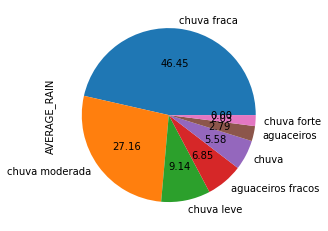

In [477]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='AVERAGE_RAIN'>

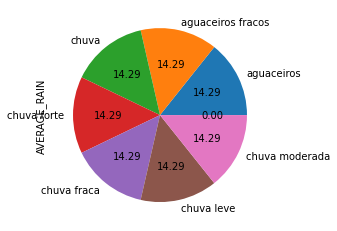

In [478]:
y_res.value_counts().plot.pie(autopct='%.2f')

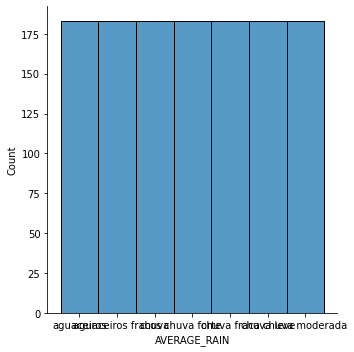

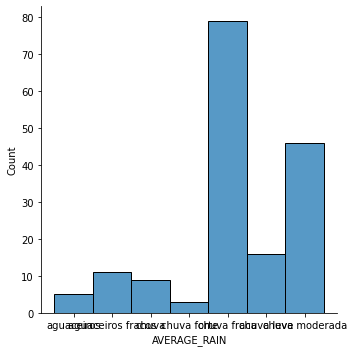

In [479]:
sns.displot(y_res)
sns.displot(y_test)

In [480]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [481]:
lr = LogisticRegression(random_state=2021,max_iter = 90000000000000)
cv = cross_val_score(lr,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.46692607 0.46484375 0.5        0.5078125  0.484375  ]
0.4847914640077821


In [482]:
dt = tree.DecisionTreeClassifier(random_state=2021)
cv = cross_val_score(dt,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.89883268 0.88671875 0.875      0.93359375 0.94140625]
0.9071102869649806


In [483]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_res.values,y_res.values,cv=5)
print(cv)
print(cv.mean())

[0.72762646 0.75       0.7734375  0.78125    0.80078125]
0.7666190418287938


In [484]:
rf = RandomForestClassifier(random_state=2021)
cv = cross_val_score(rf,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.91439689 0.9140625  0.91015625 0.9453125  0.9609375 ]
0.9289731274319066


In [485]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2021)
cv = cross_val_score(xgb,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[23:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.89883268 0.90625    0.91015625 0.94921875 0.9609375 ]
0.9250790369649806


In [486]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [487]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [488]:
param_grid =  {'n_estimators': [100,200,500,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest
Best Score: 0.9344388375486382
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


In [489]:
param_grid =  {'n_estimators': [900,1000,1100],
               'min_samples_split': [5],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [None],
               'criterion': ['entropy'],
               'bootstrap': [False]}
                                  
clf_rf = GridSearchCV(rf, param_grid= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Random Forest
Best Score: 0.9414609678988327
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


<AxesSubplot:>

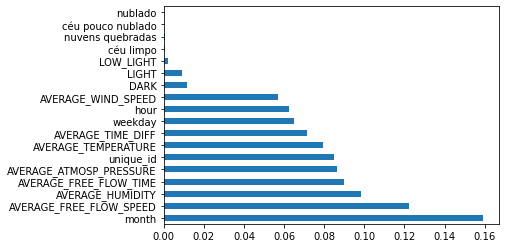

In [490]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [491]:
predictions = best_clf_rf.predict(X_test)

In [492]:
rf.fit(X_res,y_res)

RandomForestClassifier(random_state=2021)

In [493]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification

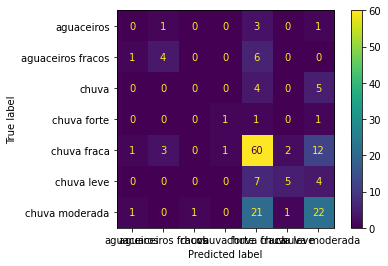

In [494]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

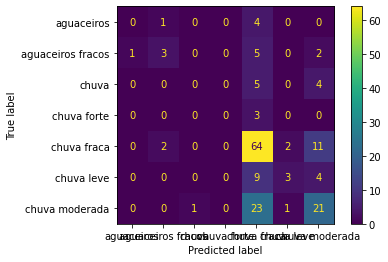

In [495]:
ConfusionMatrixDisplay.from_estimator(best_clf_rf, X_test, y_test)

In [496]:
testing = naRain

In [497]:
prediction = best_clf_rf.predict(testing)

In [498]:
prediction

array(['chuva fraca', 'chuva fraca', 'chuva fraca', ..., 'chuva fraca',
       'chuva fraca', 'chuva fraca'], dtype=object)

In [499]:
naRain['AVERAGE_RAIN'] = prediction

In [500]:
naRain['AVERAGE_RAIN'].value_counts()

chuva fraca       6238
chuva moderada       7
chuva                2
chuva forte          2
Name: AVERAGE_RAIN, dtype: int64

In [501]:
test = pd.concat([naRain, rain], ignore_index=True).sort_values(by='unique_id',ascending=True)

In [502]:
final = test[['unique_id','AVERAGE_RAIN']]

In [503]:
training = training.drop(['AVERAGE_RAIN'],axis=1)

In [504]:
training = training.merge(final,on='unique_id',how='left')

In [505]:
training = training.drop(['unique_id','weekday','hour','month'],axis=1)

In [506]:
training.to_csv('rainTrain.csv',index=False)
#training.to_csv('rainTest.csv',index=False)